# Credit Card Fraud Detection

## Imports and Data Set 

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import datetime as datetime 

%matplotlib inline 

In [2]:
transactionData = pd.read_csv('f_data.csv', index_col = 'user_id')
ipData = pd.read_csv('ip_country.csv')

In [3]:
transactionData.head(10)

,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class
user_id,,,,,,,,,,
22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0
333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0
1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1
150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0
221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0
159135,2015-05-21 06:03:03,2015-07-09 08:05:14,42,ALEYXFXINSXLZ,Ads,Chrome,M,18,2.809315e+09,0
50116,2015-08-01 22:40:52,2015-08-27 03:37:57,11,IWKVZHJOCLPUR,Ads,Chrome,F,19,3.987484e+09,0
360585,2015-04-06 07:35:45,2015-05-25 17:21:14,27,HPUCUYLMJBYFW,Ads,Opera,M,34,1.692459e+09,0
159045,2015-04-21 23:38:34,2015-06-02 14:01:54,30,ILXYDOZIHOOHT,SEO,IE,F,43,3.719094e+09,0


In [4]:
len(transactionData.columns)

10

In [5]:
transactionData.dtypes

signup_time        object
purchase_time      object
purchase_value      int64
device_id          object
source             object
browser            object
sex                object
age                 int64
ip_address        float64
class               int64
dtype: object

In [6]:
transactionData.shape 

(151112, 10)

In [7]:
## checking the nulll status

transactionData.isnull().any()

signup_time       False
purchase_time     False
purchase_value    False
device_id         False
source            False
browser           False
sex               False
age               False
ip_address        False
class             False
dtype: bool

### No Null Values in any of the columns 

## Keeping a Count of the Fraud Transactions 

In [8]:
transactionData.groupby('class')['sex'].count()

class
0    136961
1     14151
Name: sex, dtype: int64

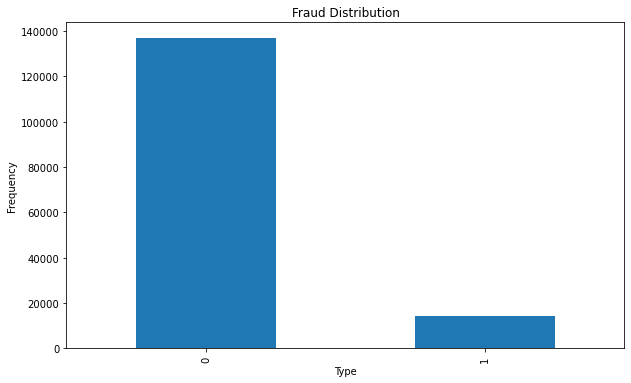

In [9]:
compareStats = pd.value_counts(transactionData['class'])
plt.figure(figsize=(10,6))

compareStats.plot(kind = 'bar') 
plt.title('Fraud Distribution')

plt.xlabel('Type')
plt.ylabel('Frequency')

plt.style.use('fivethirtyeight')

plt.show()

In [10]:
fraudTransactions = pd.DataFrame(transactionData[transactionData['class'] == 1])
legitTransactions = pd.DataFrame(transactionData[transactionData['class']== 0])

In [11]:
fraudTransactions.head()

,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class
user_id,,,,,,,,,,
1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1
171711,2015-01-11 01:51:15,2015-01-11 01:51:16,52,YPLQGKBAAULUV,Direct,IE,F,35,1.120619e+09,1
59780,2015-01-04 22:32:33,2015-01-16 01:13:43,31,WUMOBGUCBOXPO,SEO,FireFox,M,36,1.752167e+09,1
151705,2015-01-07 03:44:53,2015-01-07 03:44:54,48,URHCRIXOMLJMH,SEO,Chrome,F,27,2.836025e+09,1
345865,2015-02-01 05:59:23,2015-02-20 08:09:10,36,FKQPZUELCRKBL,SEO,IE,M,30,2.740590e+09,1


In [12]:
legitTransactions.head()

,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class
user_id,,,,,,,,,,
22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0
333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0
150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0
221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0
159135,2015-05-21 06:03:03,2015-07-09 08:05:14,42,ALEYXFXINSXLZ,Ads,Chrome,M,18,2.809315e+09,0


In [13]:
print(fraudTransactions.shape , legitTransactions.shape)

(14151, 10) (136961, 10)


In [14]:
fraudTransactions = fraudTransactions.drop_duplicates() 

fraudTransactions.shape

(14151, 10)

In [15]:
fraudTransactions.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14151 entries, 1359 to 345170
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   signup_time     14151 non-null  object 
 1   purchase_time   14151 non-null  object 
 2   purchase_value  14151 non-null  int64  
 3   device_id       14151 non-null  object 
 4   source          14151 non-null  object 
 5   browser         14151 non-null  object 
 6   sex             14151 non-null  object 
 7   age             14151 non-null  int64  
 8   ip_address      14151 non-null  float64
 9   class           14151 non-null  int64  
dtypes: float64(1), int64(3), object(6)
memory usage: 1.2+ MB


### More inferences from the two tables 

In [16]:
fraudTransactions['purchase_value'].describe()    ## the purchase value info 

count    14151.000000
mean        36.993004
std         18.397654
min          9.000000
25%         22.000000
50%         35.000000
75%         49.000000
max        111.000000
Name: purchase_value, dtype: float64

In [17]:
pd.value_counts(fraudTransactions['browser'])

Chrome     6069
IE         3187
FireFox    2342
Safari     2225
Opera       328
Name: browser, dtype: int64

In [18]:
fraudTransactions['signup_time'] = pd.to_datetime(transactionData['signup_time'])
fraudTransactions['purchase_time'] = pd.to_datetime(transactionData['purchase_time'])

fraudTransactions['session_duration'] = fraudTransactions['purchase_time'] - fraudTransactions['signup_time']

In [19]:
fraudTransactions.head(5)

,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,session_duration
user_id,,,,,,,,,,,
1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1,0 days 00:00:01
171711,2015-01-11 01:51:15,2015-01-11 01:51:16,52,YPLQGKBAAULUV,Direct,IE,F,35,1.120619e+09,1,0 days 00:00:01
59780,2015-01-04 22:32:33,2015-01-16 01:13:43,31,WUMOBGUCBOXPO,SEO,FireFox,M,36,1.752167e+09,1,11 days 02:41:10
151705,2015-01-07 03:44:53,2015-01-07 03:44:54,48,URHCRIXOMLJMH,SEO,Chrome,F,27,2.836025e+09,1,0 days 00:00:01
345865,2015-02-01 05:59:23,2015-02-20 08:09:10,36,FKQPZUELCRKBL,SEO,IE,M,30,2.740590e+09,1,19 days 02:09:47


In [20]:
fraudTransactions.groupby('sex')['age'].count()

sex
F    5717
M    8434
Name: age, dtype: int64

In [21]:
fraudTransactions.groupby('age')['sex'].count()

age
18    270
19    242
20    308
21    289
22    378
23    490
24    475
25    400
26    433
27    502
28    611
29    572
30    584
31    615
32    719
33    648
34    547
35    607
36    721
37    493
38    461
39    504
40    480
41    408
42    410
43    281
44    251
45    237
46    168
47    188
48    173
49     79
50    135
51     78
52     82
53     73
54     64
55     42
56     35
57     19
58     30
59      5
60      6
61     16
62      2
63     16
64      1
65      1
66      1
68      1
Name: sex, dtype: int64

In [22]:
fraudTransactions.session_duration.describe()

count                         14151
mean     28 days 01:17:22.350293539
std      38 days 08:29:48.829766844
min                 0 days 00:00:01
25%                 0 days 00:00:01
50%                 0 days 00:00:01
75%         55 days 10:41:50.500000
max               119 days 22:52:27
Name: session_duration, dtype: object

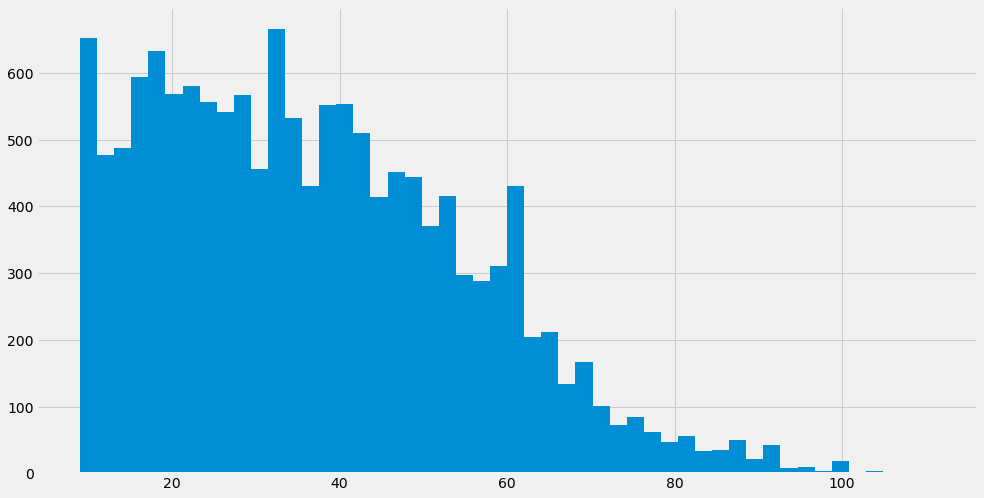

In [23]:
## graph of the amount per transaction for a fraud 

plt.figure(figsize=(15,8))
plt.hist(fraudTransactions['purchase_value'], bins = 50)

plt.style.use('fivethirtyeight')
plt.show()


In [24]:
hour_fraud = pd.DataFrame(fraudTransactions['purchase_time'])
hour_fraud['hours'] = hour_fraud['purchase_time'].apply(lambda x : x.time().hour)

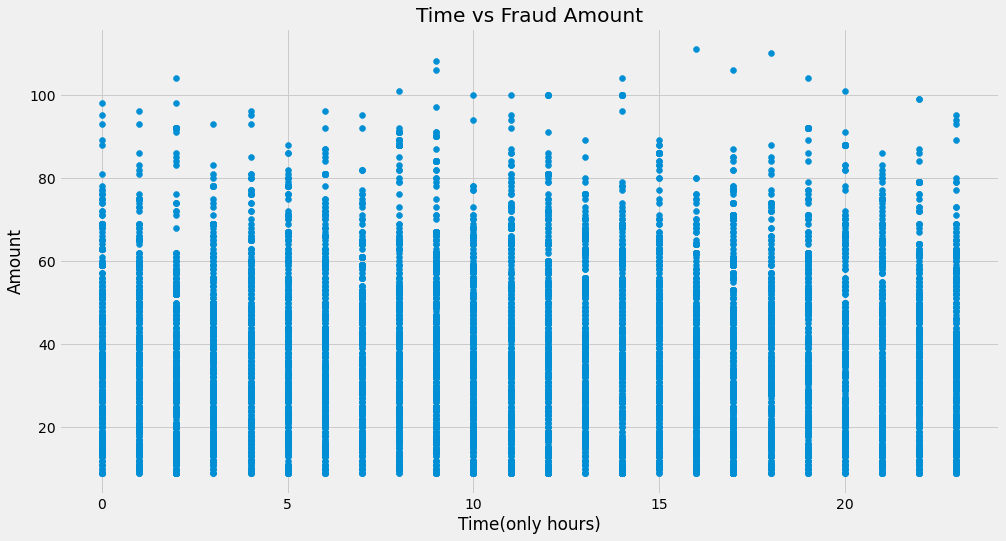

In [25]:
plt.figure(figsize = (15,8))

plt.scatter(hour_fraud.hours, fraudTransactions.purchase_value)
plt.title('Time vs Fraud Amount')
plt.xlabel('Time(only hours)')
plt.ylabel('Amount')

plt.show()

In [26]:
fraudTransactions.purchase_value.describe()

count    14151.000000
mean        36.993004
std         18.397654
min          9.000000
25%         22.000000
50%         35.000000
75%         49.000000
max        111.000000
Name: purchase_value, dtype: float64

In [27]:
fraudTransactions.groupby('browser')['age'].count()

browser
Chrome     6069
FireFox    2342
IE         3187
Opera       328
Safari     2225
Name: age, dtype: int64

## Normalising the values of purchase 


In [28]:
purchaseNM = fraudTransactions.purchase_value.apply(lambda x : (x - fraudTransactions.purchase_value.mean())/(fraudTransactions.purchase_value.max() - fraudTransactions.purchase_value.min()) )

In [29]:
purchaseNM.describe()

count    1.415100e+04
mean     1.286277e-17
std      1.803692e-01
min     -2.744412e-01
25%     -1.469902e-01
50%     -1.953926e-02
75%      1.177156e-01
max      7.255588e-01
Name: purchase_value, dtype: float64

## Sample Data 

In [30]:
## picking up a chunk of data 

sampleData = transactionData.sample(frac = 0.2 , random_state= 1)

sampleData.shape

(30222, 10)

In [31]:
pd.value_counts(sampleData['class'])

0    27351
1     2871
Name: class, dtype: int64

In [32]:
fraudSample = sampleData[sampleData['class'] == 1]
legitSample = sampleData[sampleData['class'] == 0]

print(fraudSample.shape, legitSample.shape)

(2871, 10) (27351, 10)


In [33]:
coeff = sampleData.corr()
coeff

,purchase_value,age,ip_address,class
purchase_value,1.000000,0.000521,-0.015858,0.002526
age,0.000521,1.000000,0.005461,0.004399
ip_address,-0.015858,0.005461,1.000000,-0.003595
class,0.002526,0.004399,-0.003595,1.000000


In [34]:
q = coeff.index 
q

Index(['purchase_value', 'age', 'ip_address', 'class'], dtype='object')

<AxesSubplot:>

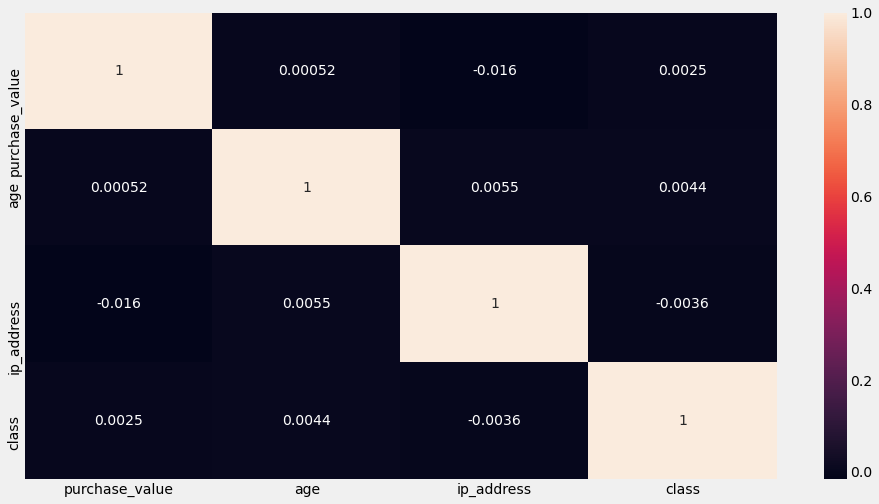

In [35]:
plt.figure(figsize=(15,8))

sns.heatmap(sampleData[q].corr(),annot=True)

In [36]:
outlierFraction  = fraudSample.shape[0] / legitSample.shape[0]

outlierFraction

0.10496873971701218

In [67]:
col = fraudSample.columns.tolist() 
col = [x for x in col if x not in ["class",'purchase_time','signup_time','device_id','source','browser','sex']]

col

['purchase_value', 'age', 'ip_address']

In [68]:
X = sampleData[col]
Y = sampleData['class']
state = np.random.RandomState(44)
X_outliers = state.uniform(low = 0 , high = 1 , size = (X.shape[0], X.shape[1]))


In [69]:
X.shape

(30222, 3)

In [70]:
Y.shape

(30222,)

## Sci-kit Imports 

In [71]:
from sklearn.metrics import classification_report,accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor

In [72]:
classifiers = {
    "Isolation Forest":IsolationForest(n_estimators=100, max_samples=len(X), 
                                       contamination=outlierFraction,random_state=state, verbose=0),
    "Local Outlier Factor":LocalOutlierFactor(n_neighbors=20, algorithm='auto', 
                                              leaf_size=30, metric='minkowski',
                                              p=2, metric_params=None, contamination=outlierFraction)   
}

In [73]:
for i, (clf_name,clf) in enumerate(classifiers.items()):
    #Fit the data and tag outliers
    if clf_name == "Local Outlier Factor":
        y_pred = clf.fit_predict(X)
        scores_prediction = clf.negative_outlier_factor_
    else:
        
        clf.fit(X)
        scores_prediction = clf.decision_function(X)
        y_pred = clf.predict(X)
    #Reshape the prediction values to 0 for Valid transactions , 1 for Fraud transactions
    y_pred[y_pred == 1] = 0
    y_pred[y_pred == -1] = 1
    n_errors = (y_pred != Y).sum()
    # Run Classification Metrics
    print("{}: {}".format(clf_name,n_errors))
    print("Accuracy Score :")
    print(accuracy_score(Y,y_pred))
    print("Classification Report :")
    print(classification_report(Y,y_pred))

Isolation Forest: 5576
Accuracy Score :
0.8154986433723778
Classification Report :
              precision    recall  f1-score   support

           0       0.90      0.89      0.90     27351
           1       0.07      0.08      0.08      2871

    accuracy                           0.82     30222
   macro avg       0.49      0.49      0.49     30222
weighted avg       0.82      0.82      0.82     30222

Local Outlier Factor: 5620
Accuracy Score :
0.8140427503143406
Classification Report :
              precision    recall  f1-score   support

           0       0.90      0.89      0.90     27351
           1       0.07      0.07      0.07      2871

    accuracy                           0.81     30222
   macro avg       0.48      0.48      0.48     30222
weighted avg       0.82      0.81      0.82     30222

